# Exploratory Time Series Analysis

We have a time series dataset of the distance flown by all UK airlines between 1963-1970 in miles. We use this data to perform some basic Exploratory Time Series Analysis in Python.

Attempts have been made to add comments and explain steps wherever possible. 



In [ ]:
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np
import numpy.linalg      as la

from datetime                    import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving airline.dta to airline.dta


In [ ]:
#Setting visualisation preferences for Seaborn

sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure',figsize=(16, 6))

In [ ]:
#Reading the data and setting it as the dataframe

df = pd.read_stata("airline.dta")

df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

In [ ]:
#Finding the fundamental attributes of the dataset

df['miles'].describe()

count       96.000000
mean     10385.739258
std       2202.500488
min       6178.000000
25%       8600.250000
50%      10401.000000
75%      11768.000000
max      16234.000000
Name: miles, dtype: float64

In [ ]:
df.head(12)

,year,month,miles
0,1963,1,6827.0
1,1963,2,6178.0
2,1963,3,7084.0
3,1963,4,8162.0
4,1963,5,8462.0
5,1963,6,9644.0
6,1963,7,10466.0
7,1963,8,10748.0
8,1963,9,9963.0
9,1963,10,8194.0


In [ ]:
df['dat'] = df['year'] + '-' + df['month']
df.head(12)

,year,month,miles,dat
0,1963,1,6827.0,1963-1
1,1963,2,6178.0,1963-2
2,1963,3,7084.0,1963-3
3,1963,4,8162.0,1963-4
4,1963,5,8462.0,1963-5
5,1963,6,9644.0,1963-6
6,1963,7,10466.0,1963-7
7,1963,8,10748.0,1963-8
8,1963,9,9963.0,1963-9
9,1963,10,8194.0,1963-10


**Here we create a preliminary plot of the data with matplotlib. Here we visually notice a trend and a seasonality.** 


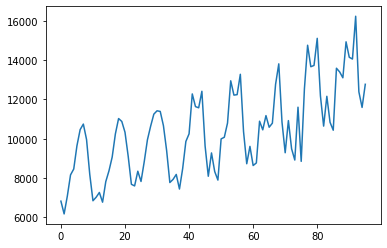

In [ ]:
df['miles'].plot()
plt.show()

In [ ]:
df1 = df[df['year']<='1966']

In [ ]:
df1.head()

,year,month,miles,dat
0,1963,1,6827.0,1963-1
1,1963,2,6178.0,1963-2
2,1963,3,7084.0,1963-3
3,1963,4,8162.0,1963-4
4,1963,5,8462.0,1963-5


In [ ]:
df1.tail()

,year,month,miles,dat
43,1966,8,11577.0,1966-8
44,1966,9,12417.0,1966-9
45,1966,10,9637.0,1966-10
46,1966,11,8094.0,1966-11
47,1966,12,9280.0,1966-12


In [ ]:
df1['miles'].describe()

count       48.000000
mean      9174.583008
std       1641.827515
min       6178.000000
25%       7826.500000
50%       9089.000000
75%      10509.000000
max      12417.000000
Name: miles, dtype: float64

**Creating a trend variable and then regressing 'miles' variable on it in the next step.**

In [ ]:
df['trend']= range(1,len(df['miles'])+1)
df.head()

,year,month,miles,dat,trend
0,1963,1,6827.0,1963-1,1
1,1963,2,6178.0,1963-2,2
2,1963,3,7084.0,1963-3,3
3,1963,4,8162.0,1963-4,4
4,1963,5,8462.0,1963-5,5


In [ ]:
df.tail()

,year,month,miles,dat,trend
187,1978,8,NaN,1978-8,188
188,1978,9,NaN,1978-9,189
189,1978,10,NaN,1978-10,190
190,1978,11,NaN,1978-11,191
191,1978,12,NaN,1978-12,192


**Regressing the trend variable on the miles variable.**

In [ ]:
X = df[['trend']]
X = sm.add_constant(X)
Y = df[['miles']]

reg = sm.OLS(Y, X, missing='drop')

result = reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  miles   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     84.52
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           9.53e-15
Time:                        10:33:19   Log-Likelihood:                -843.87
No. Observations:                  96   AIC:                             1692.
Df Residuals:                      94   BIC:                             1697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7747.1741    330.542     23.438      0.0

In [ ]:
#PCarrying out the regression

df['yhat'] = result.predict(X)
df.head(12)

,year,month,miles,dat,trend,yhat
0,1963,1,6827.0,1963-1,1,7801.577534
1,1963,2,6178.0,1963-2,2,7855.980946
2,1963,3,7084.0,1963-3,3,7910.384357
3,1963,4,8162.0,1963-4,4,7964.787769
4,1963,5,8462.0,1963-5,5,8019.191181
5,1963,6,9644.0,1963-6,6,8073.594592
6,1963,7,10466.0,1963-7,7,8127.998004
7,1963,8,10748.0,1963-8,8,8182.401415
8,1963,9,9963.0,1963-9,9,8236.804827
9,1963,10,8194.0,1963-10,10,8291.208238


In [ ]:
#Here we generate a trend variable and regress 'miles' on it

df['ehat'] = df['miles'] - result.predict(X)
df.head(12)

,year,month,miles,dat,trend,yhat,ehat
0,1963,1,6827.0,1963-1,1,7801.577534,-974.577534
1,1963,2,6178.0,1963-2,2,7855.980946,-1677.980946
2,1963,3,7084.0,1963-3,3,7910.384357,-826.384357
3,1963,4,8162.0,1963-4,4,7964.787769,197.212231
4,1963,5,8462.0,1963-5,5,8019.191181,442.808819
5,1963,6,9644.0,1963-6,6,8073.594592,1570.405408
6,1963,7,10466.0,1963-7,7,8127.998004,2338.001996
7,1963,8,10748.0,1963-8,8,8182.401415,2565.598585
8,1963,9,9963.0,1963-9,9,8236.804827,1726.195173
9,1963,10,8194.0,1963-10,10,8291.208238,-97.208238


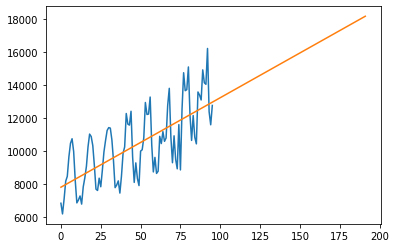

In [ ]:
#Plotting a time serioes graph of miles and the trend variable

df['miles'].plot()
df['yhat'].plot()
plt.show()

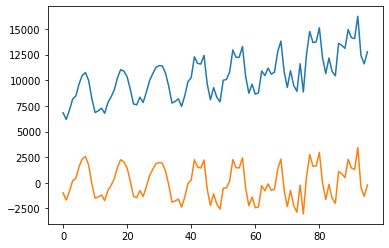

In [ ]:
df['miles'].plot()
df['ehat'].plot()
plt.show()

In [ ]:
df['ehat'].describe()

count    9.600000e+01
mean     3.789561e-14
std      1.598204e+03
min     -3.029833e+03
25%     -1.342751e+03
50%     -1.993959e+02
75%      1.449895e+03
max      3.427309e+03
Name: ehat, dtype: float64

In [ ]:
df2 = df[(df['month'] <= '9') & (df['month'] >= '6')]
df2['ehat'].describe()

count      32.000000
mean     1786.763255
std       835.730770
min      -749.799286
25%      1451.454979
50%      1799.959352
75%      2271.160949
max      3427.308602
Name: ehat, dtype: float64

In [ ]:
#Here we generate a set of month dummy variables.

dummy = pd.get_dummies(df["month"])
dummy.columns = ["m1", "m2", "m3", "m4", "m5", "m6", "m7", "m8", "m9", "m10", "m11", "m12"]
dummy.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:

df2 =  pd.concat([df, dummy], axis=1)
df2 =  df2.drop(columns=['m1'])

df2.head()

,year,month,miles,dat,trend,yhat,ehat,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1963,1,6827.0,1963-1,1,7801.577534,-974.577534,0,0,0,0,0,0,0,0,0,0,0
1,1963,2,6178.0,1963-2,2,7855.980946,-1677.980946,0,0,0,1,0,0,0,0,0,0,0
2,1963,3,7084.0,1963-3,3,7910.384357,-826.384357,0,0,0,0,1,0,0,0,0,0,0
3,1963,4,8162.0,1963-4,4,7964.787769,197.212231,0,0,0,0,0,1,0,0,0,0,0
4,1963,5,8462.0,1963-5,5,8019.191181,442.808819,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
XX = df2[["trend", "m2", "m3", "m4", "m5", "m6", "m7", "m8", "m9", "m10", "m11", "m12"]]
XX = sm.add_constant(XX)
YY = df2[['miles']]

reg1 = sm.OLS(YY, XX, missing='drop')

result1 = reg1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  miles   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     66.58
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           2.28e-37
Time:                        10:37:49   Log-Likelihood:                -761.22
No. Observations:                  96   AIC:                             1548.
Df Residuals:                      83   BIC:                             1582.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6214.6957    280.408     22.163      0.0

In [ ]:
df2['yhat'] = result1.predict(XX)
df2.head(12)

,year,month,miles,dat,trend,yhat,ehat,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1963,1,6827.0,1963-1,1,6267.65625,-974.577534,0,0,0,0,0,0,0,0,0,0,0
1,1963,2,6178.0,1963-2,2,5807.15625,-1677.980946,0,0,0,1,0,0,0,0,0,0,0
2,1963,3,7084.0,1963-3,3,7563.15625,-826.384357,0,0,0,0,1,0,0,0,0,0,0
3,1963,4,8162.0,1963-4,4,7667.15625,197.212231,0,0,0,0,0,1,0,0,0,0,0
4,1963,5,8462.0,1963-5,5,8530.78125,442.808819,0,0,0,0,0,0,1,0,0,0,0
5,1963,6,9644.0,1963-6,6,9857.78125,1570.405408,0,0,0,0,0,0,0,1,0,0,0
6,1963,7,10466.0,1963-7,7,9699.03125,2338.001996,0,0,0,0,0,0,0,0,1,0,0
7,1963,8,10748.0,1963-8,8,9950.90625,2565.598585,0,0,0,0,0,0,0,0,0,1,0
8,1963,9,9963.0,1963-9,9,10502.53125,1726.195173,0,0,0,0,0,0,0,0,0,0,1
9,1963,10,8194.0,1963-10,10,8042.28125,-97.208238,1,0,0,0,0,0,0,0,0,0,0


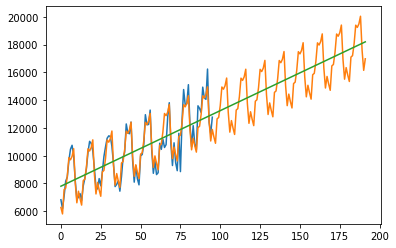

In [ ]:
df2['miles'].plot()
df2['yhat'].plot()
df['yhat'].plot()
plt.show()